In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt	
import seaborn as sns	

In [8]:
# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv("archivo_casi_listo.csv", index_col=0)
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'latitud', 'longitud',
       'continent'],
      dtype='object')

¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

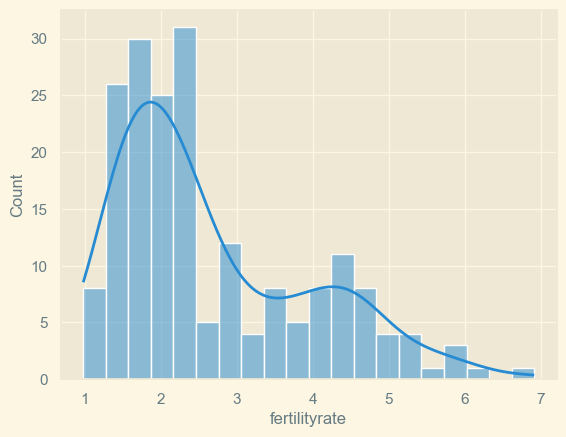

In [23]:
sns.histplot(data = df, x = "fertilityrate", bins = 20, kde = True);

Vemos que la mayoria de los países tienen entre 1 y 2 hijos. Hay muy pocos que tengan una gran cantidad de hijos.

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

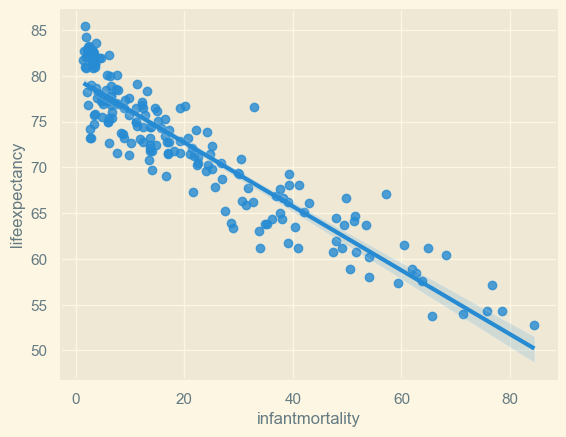

In [25]:
sns.regplot(x = "infantmortality", y = "lifeexpectancy", data = df);

Hay una relación negativa, cuanto más baja la mortalidad infantil mayor es la esperanza de vida y viceversa.

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [37]:
num_country = df.groupby("continent")["country"].count().reset_index()
num_country

,continent,country
0,Africa,53
1,Asia,48
2,Europe,44
3,North America,23
4,Oceania,14
5,South America,12
6,Unknown,1


In [43]:
num_country["continent"].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America', 'Unknown'], dtype=object)

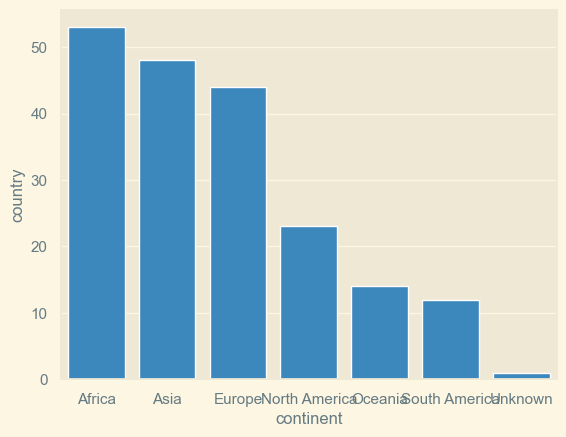

In [72]:
sns.barplot(x = "continent", y = "country", data = num_country);
#Podríamos haber usado el countplot pero con el df original, porque contaría cuantas veces aparecee África en el original

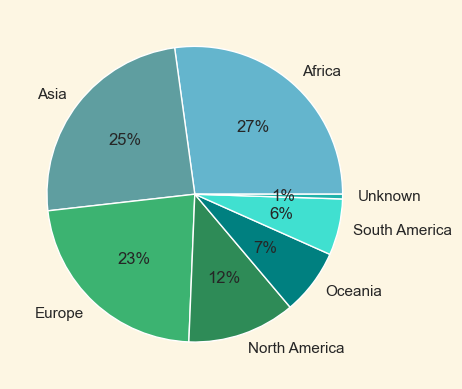

In [58]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

plt.pie("country", labels= "continent",data = num_country, colors = colores, autopct=  '%1.0f%%');
#En este gráfico solo podemos expresarlo con porcentajes 

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. 

In [66]:
euro_countries = df[df["continent"] == "Europe"]

<Axes: xlabel='lifeexpectancy'>

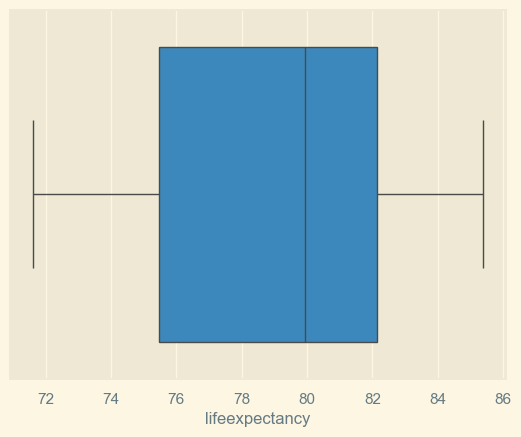

In [67]:
sns.boxplot(x= "lifeexpectancy", data= euro_countries)

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

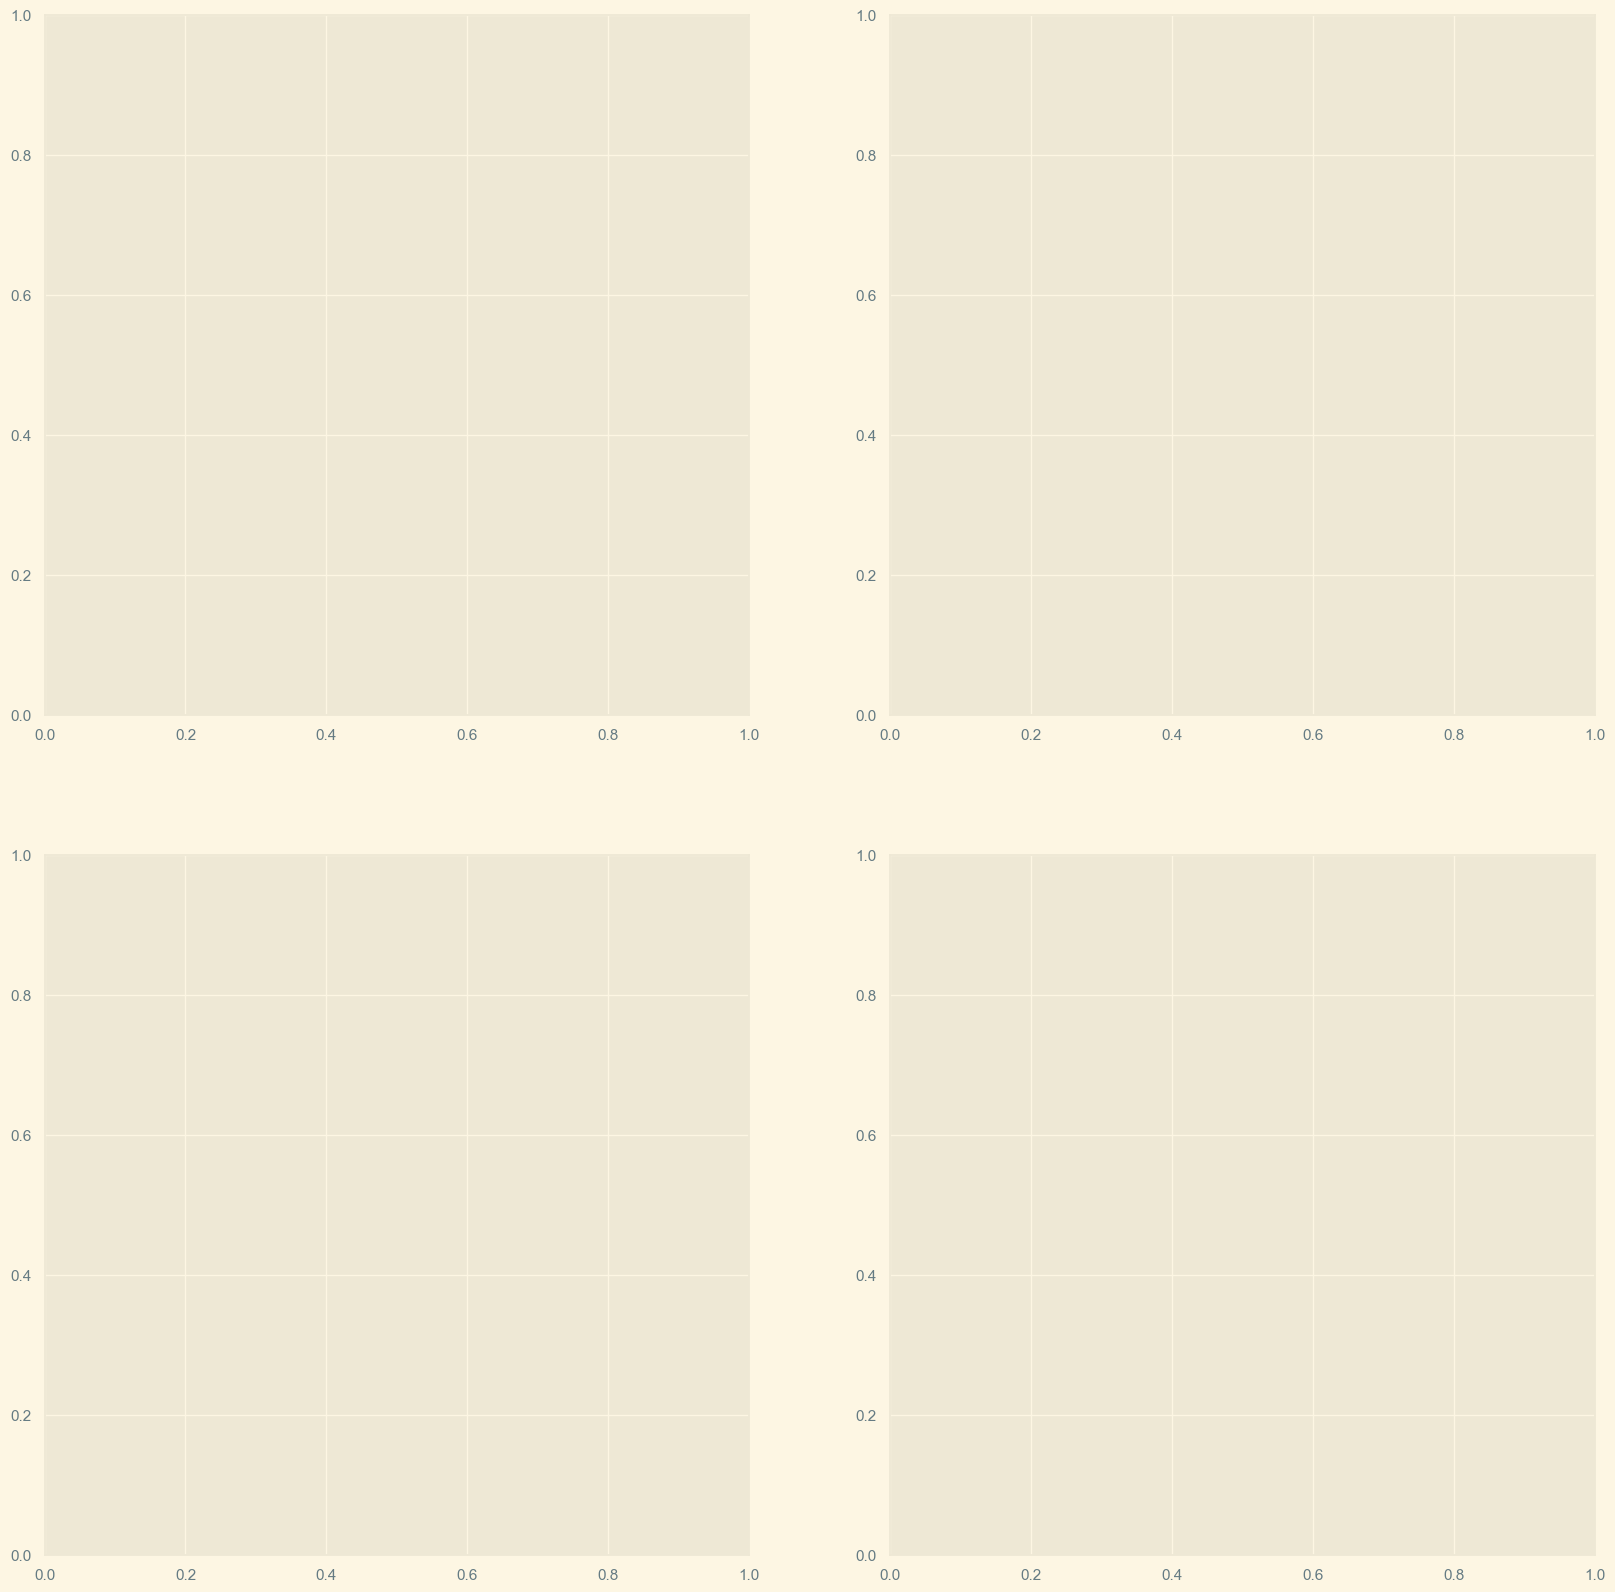

In [74]:
lista = ["infantmortality", "lifeexpectancy", "density", "urban_population"]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
axes.flat
for indice, elemento in enumerate(lista):
    sns.regplot(x = "fertilityrate", y = elemento, data = df, ax = axes[indice])

In [26]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'latitud', 'longitud',
       'continent'],
      dtype='object')